In [418]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
pd.options.mode.chained_assignment = None  # default='warn'

In [419]:
# download data from https://coronavirus.data.gov.uk/archive
path = "data/"
cases_url = 'https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv'
deaths_url ='https://coronavirus.data.gov.uk/downloads/csv/coronavirus-deaths_latest.csv'

def download_csv(url):
    response = requests.get(url)
    file_name = url.split('/')[-1]
    with open(os.path.join(path, file_name), 'wb') as f:
        f.write(response.content)

download_csv(cases_url)
download_csv(deaths_url)

In [420]:
cases_df = pd.read_csv('data/coronavirus-cases_latest.csv')
cases_df.head()

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
0,England,E92000001,Nation,2020-07-25,0,0.0,0.0,257138,256428.0,710.0,459.4
1,South West,E12000009,Region,2020-07-25,0,NaN,NaN,13078,NaN,NaN,233.5
2,South East,E12000008,Region,2020-07-25,0,NaN,NaN,35016,NaN,NaN,383.4
3,London,E12000007,Region,2020-07-25,0,NaN,NaN,34930,NaN,NaN,392.1
4,East of England,E12000006,Region,2020-07-25,0,NaN,NaN,24460,NaN,NaN,394.4


In [421]:
deaths_df = pd.read_csv('data/coronavirus-deaths_latest.csv')
deaths_df.head()

,Area name,Area code,Area type,Reporting date,Daily change in deaths,Cumulative deaths
0,Wales,W92000004,Nation,2020-07-25,0.0,1548
1,Scotland,S92000003,Nation,2020-07-25,0.0,2491
2,Northern Ireland,N92000002,Nation,2020-07-25,0.0,556
3,United Kingdom,K02000001,UK,2020-07-25,61.0,45738
4,England,E92000001,Nation,2020-07-25,61.0,41143


In [422]:
cases_df.describe()

,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
count,53412.000000,160.00000,160.000000,53412.000000,160.00000,160.000000,53412.000000
mean,18.783569,1602.67500,4.437500,1509.033494,139173.11250,15.787500,267.007933
std,124.687197,1444.16254,32.438561,9825.900102,99360.56192,100.369969,190.755905
min,0.000000,0.00000,-8.000000,1.000000,2.00000,-11.000000,0.000000
25%,2.000000,521.75000,-1.000000,163.000000,22400.75000,-6.000000,99.700000
50%,5.000000,991.50000,0.000000,467.000000,171161.00000,0.000000,262.700000
75%,13.000000,2767.25000,1.000000,1018.000000,234027.00000,1.000000,394.600000
max,4797.000000,4797.00000,370.000000,257138.000000,256428.00000,710.000000,1342.300000


In [423]:
deaths_df.describe()

,Daily change in deaths,Cumulative deaths
count,672.000000,676.000000
mean,136.123512,11532.548817
std,243.800799,16189.236431
min,-10.000000,1.000000
25%,3.000000,520.250000
50%,17.000000,1540.000000
75%,144.750000,26200.500000
max,1173.000000,45738.000000


In [424]:
print("Check cases csv for null values:\n")
print(cases_df.isnull().sum())
print("\nCheck deaths csv for null values:\n")
print(deaths_df.isnull().sum())

Check cases csv for null values:

Area name                                   0
Area code                                   0
Area type                                   0
Specimen date                               0
Daily lab-confirmed cases                   0
Previously reported daily cases         53252
Change in daily cases                   53252
Cumulative lab-confirmed cases              0
Previously reported cumulative cases    53252
Change in cumulative cases              53252
Cumulative lab-confirmed cases rate         0
dtype: int64

Check deaths csv for null values:

Area name                 0
Area code                 0
Area type                 0
Reporting date            0
Daily change in deaths    4
Cumulative deaths         0
dtype: int64


In [425]:
print("cases dataframe shape: ", cases_df.shape)
print("deaths dataframe shape: ", deaths_df.shape)

cases dataframe shape:  (53412, 11)
deaths dataframe shape:  (676, 6)


In [426]:
# DATA CLEANING

In [427]:
cases_df.drop(['Previously reported daily cases', 'Change in daily cases', 'Previously reported cumulative cases', 
                'Change in cumulative cases'], axis=1, inplace=True)

In [428]:
cases_df.head() # NaN values removed

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate
0,England,E92000001,Nation,2020-07-25,0,257138,459.4
1,South West,E12000009,Region,2020-07-25,0,13078,233.5
2,South East,E12000008,Region,2020-07-25,0,35016,383.4
3,London,E12000007,Region,2020-07-25,0,34930,392.1
4,East of England,E12000006,Region,2020-07-25,0,24460,394.4


In [429]:
cases_df['Specimen date'] = pd.to_datetime(cases_df['Specimen date'])
deaths_df['Reporting date'] = pd.to_datetime(deaths_df['Reporting date'])
print("Cases dataframe data types:\n", cases_df.dtypes)
print("\nDeaths dataframe data types:\n", deaths_df.dtypes)

Cases dataframe data types:
 Area name                                      object
Area code                                      object
Area type                                      object
Specimen date                          datetime64[ns]
Daily lab-confirmed cases                       int64
Cumulative lab-confirmed cases                  int64
Cumulative lab-confirmed cases rate           float64
dtype: object

Deaths dataframe data types:
 Area name                         object
Area code                         object
Area type                         object
Reporting date            datetime64[ns]
Daily change in deaths           float64
Cumulative deaths                  int64
dtype: object


In [430]:
# DATA ANALYSIS

In [431]:
#### 1 : Checks cases and deaths for each region/nation

In [432]:
region_df = cases_df[cases_df['Area type']=='Region']
region_cases = region_df.groupby('Area name').max()['Cumulative lab-confirmed cases']
print('\033[1m' + 'Total cases in each Region :\n' + '\033[0m')
for index, value in region_cases.items():
    print(f"{index}: {value}")  

Total cases in each Region :

East Midlands: 22972
East of England: 24460
London: 34930
North East: 15284
North West: 45046
South East: 35016
South West: 13078
West Midlands: 26636
Yorkshire and The Humber: 31288


In [433]:
nation_df = deaths_df[deaths_df['Area type']=='Nation']
nation_deaths = nation_df.groupby('Area name').max()['Cumulative deaths']
print('\033[1m' + 'Total deaths in each Nation :\n' + '\033[0m')
for index, value in nation_deaths.items():
    print(f"{index}: {value}")  

Total deaths in each Nation :

England: 41143
Northern Ireland: 556
Scotland: 2491
Wales: 1548


In [434]:
#### 2 : Month with highest daily cases and deaths

In [435]:
cases_df['Month'] = pd.DatetimeIndex(cases_df['Specimen date']).month
deaths_df['Month'] = pd.DatetimeIndex(deaths_df['Reporting date']).month

In [436]:
cases_per_month = cases_df.groupby('Month').sum()['Daily lab-confirmed cases']
cases_per_month
cases_per_month[cases_per_month == cases_per_month.max()] 
# This shows that the highest daily cases were in the 4th month meaning April, which where it peaked

Month
4    455826
Name: Daily lab-confirmed cases, dtype: int64

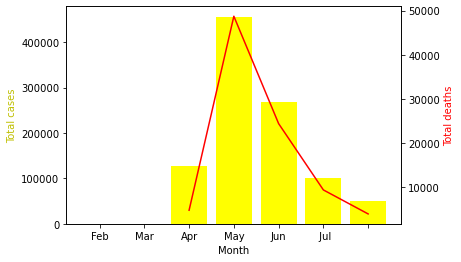

In [437]:
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',' Jul']

deaths_per_month = deaths_df.groupby('Month').sum()['Daily change in deaths']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(np.arange(7),cases_per_month, color='yellow')
ax2.plot(np.arange(2,7), deaths_per_month, 'r-')

ax1.set_xlabel('Month')
ax1.set_ylabel('Total cases', color='y')
ax2.set_ylabel('Total deaths', color='r')
ax1.set_xticklabels(x)
plt.show()

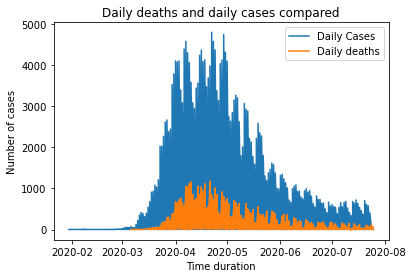

In [438]:
# daily cases compared to daily deaths
x1 = cases_df['Specimen date']
y1 = cases_df['Daily lab-confirmed cases']  
x2 = deaths_df['Reporting date'] 
y2 = deaths_df['Daily change in deaths']

plt.plot(x1, y1, label = "Daily Cases")   
plt.plot(x2, y2, label = "Daily deaths") 
plt.xlabel('Time duration') 
plt.ylabel('Number of cases') 
plt.title('Daily deaths and daily cases compared') 
plt.legend() 
plt.show()

In [439]:
#### 3 : Check for region with highest accumlative cases and deaths

In [440]:
region_df = cases_df[cases_df['Area type']=='Region']
region_df = region_df.groupby('Area name').max()
region_df = region_df[['Area code', 'Cumulative lab-confirmed cases']].sort_values(by='Cumulative lab-confirmed cases',ascending=False)
region_df.style.background_gradient(cmap='Reds')

,Area code,Cumulative lab-confirmed cases
Area name,,
North West,E12000002,45046
South East,E12000008,35016
London,E12000007,34930
Yorkshire and The Humber,E12000003,31288
West Midlands,E12000005,26636
East of England,E12000006,24460
East Midlands,E12000004,22972
North East,E12000001,15284
South West,E12000009,13078


In [441]:
nation_df = deaths_df[deaths_df['Area type']=='Nation']
nation_df = nation_df.groupby('Area name').max()
nation_df = nation_df[['Area code', 'Cumulative deaths']].sort_values(by='Area name')
nation_df.style.background_gradient(cmap='Reds')

,Area code,Cumulative deaths
Area name,,
England,E92000001,41143
Northern Ireland,N92000002,556
Scotland,S92000003,2491
Wales,W92000004,1548


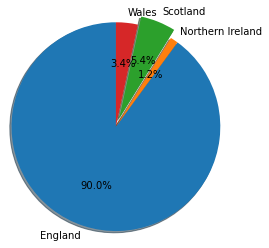

In [442]:
nation_names = deaths_df[deaths_df['Area type'] == 'Nation']
nation_names = nation_names['Area name'].unique()
nation_names = np.sort(nation_names)

data = nation_df['Cumulative deaths']

plt.pie(data, labels=nation_names, 
        startangle=90, shadow = True, explode = (0, 0, 0.1, 0), 
        radius = 1.2, autopct = '%1.1f%%') 
plt.show() 

In [443]:
#### 4 : display daily cases each month 

Text(0.5, 1.0, 'July')

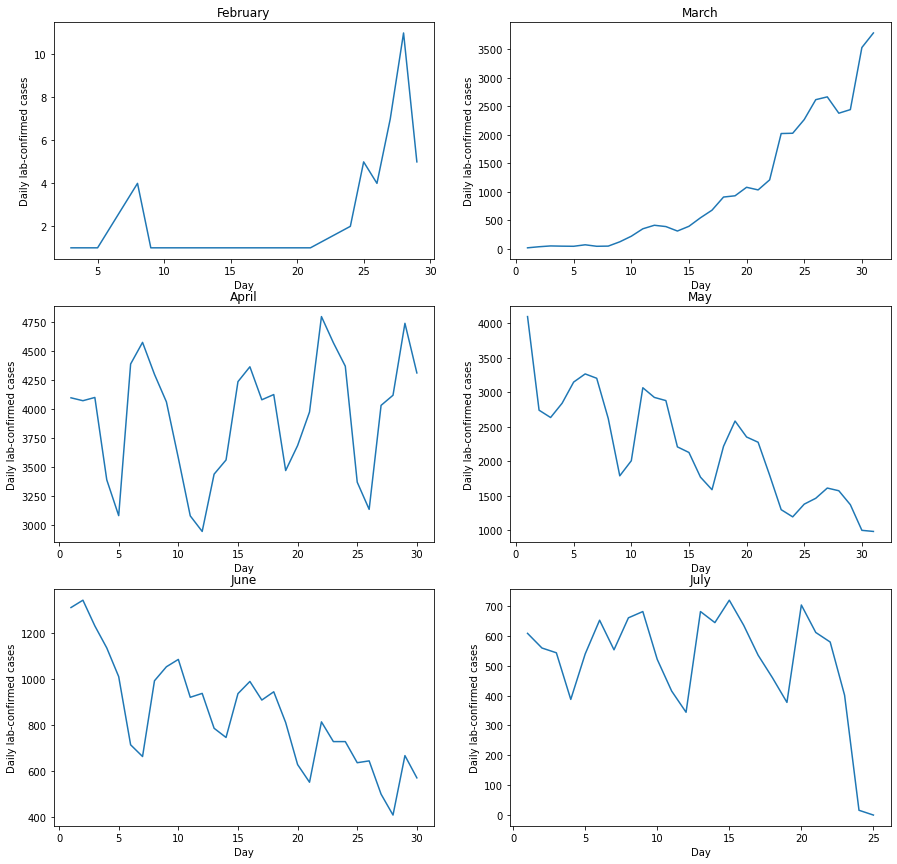

In [499]:
cases_df['Day'] = pd.DatetimeIndex(cases_df['Specimen date']).day
eng_cases = cases_df[cases_df['Area name']=='England']
eng_cases_7 = eng_cases[eng_cases['Month']==7]
eng_cases_6 = eng_cases[eng_cases['Month']==6]
eng_cases_5 = eng_cases[eng_cases['Month']==5]
eng_cases_4 = eng_cases[eng_cases['Month']==4]
eng_cases_3 = eng_cases[eng_cases['Month']==3]
eng_cases_2 = eng_cases[eng_cases['Month']==2]

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.lineplot(x='Day',y='Daily lab-confirmed cases',data=eng_cases_2, palette='hsv')
plt.title('February')
plt.subplot(4,2,2)
sns.lineplot(x='Day',y='Daily lab-confirmed cases',data=eng_cases_3, palette='hsv')
plt.title('March')
plt.subplot(4,2,3)
sns.lineplot(x='Day',y='Daily lab-confirmed cases',data=eng_cases_4, palette='hsv')
plt.title('April')
plt.subplot(4,2,4)
sns.lineplot(x='Day',y='Daily lab-confirmed cases',data=eng_cases_5, palette='hsv')
plt.title('May')
plt.subplot(4,2,5)
sns.lineplot(x='Day',y='Daily lab-confirmed cases',data=eng_cases_6, palette='hsv')
plt.title('June')
plt.subplot(4,2,6)
sns.lineplot(x='Day',y='Daily lab-confirmed cases',data=eng_cases_7, palette='hsv')
plt.title('July')

This shows increases in daily cases in every month in England.
It can be seen that March had the highest increase in proportion compared to the other months whereas April had the highest amount of daily cases but had a higher variation in cases throughout the days. From July it can be seen that daily cases had started to decrease as a result of reduced contact with people to decrease the spread.

In [494]:
#### 5 : check which week day gets more cases

In [508]:
day_daily_cases = cases_df['Day name'] = cases_df['Specimen date'].dt.day_name()
day_daily_cases = cases_df.groupby(['Month','Day name']).sum()
day_daily_cases.head()

Daily lab-confirmed cases  Cumulative lab-confirmed cases  \
Month Day name                                                              
1     Thursday                          5                               5   
2     Friday                           48                             123   
      Monday                           12                              33   
      Saturday                         33                             111   
      Sunday                            4                              26   

                Cumulative lab-confirmed cases rate  Day  
Month Day name                                            
1     Thursday                                  1.0  120  
2     Friday                                   13.8  840  
      Monday                                    2.8  180  
      Saturday                                  8.7  338  
      Sunday                                    3.5   36

In [546]:
test = cases_df.groupby(['Month','Day name'])
testing = test['Daily lab-confirmed cases'].max().reset_index()
testing = testing.sort_values(by='Daily lab-confirmed cases',ascending=False)
testing.head(10)

,Month,Day name,Daily lab-confirmed cases
21,4,Wednesday,4797
20,4,Tuesday,4575
19,4,Thursday,4572
16,4,Monday,4389
15,4,Friday,4370
17,4,Saturday,4126
22,5,Friday,4096
13,3,Tuesday,3782
9,3,Monday,3527
18,4,Sunday,3472


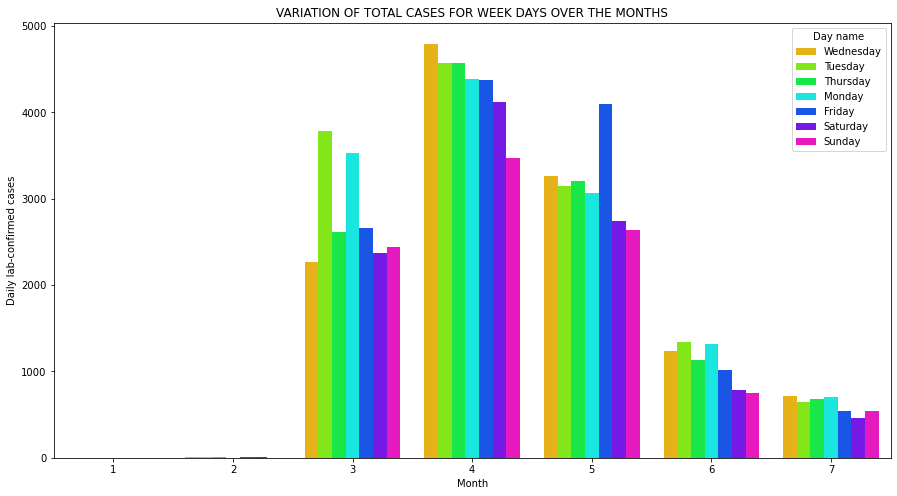

In [549]:
plt.figure(figsize=(15,8))
sns.barplot(x='Month', y= 'Daily lab-confirmed cases',data=testing,hue='Day name',palette='hsv',saturation=.80)
plt.title('VARIATION OF TOTAL CASES FOR WEEK DAYS OVER THE MONTHS')
plt.show()

In [544]:
a = testing[['Day name','Daily lab-confirmed cases']]
a.groupby('Day name').sum().style.background_gradient(cmap='Blues')

,Daily lab-confirmed cases
Day name,
Friday,12695
Monday,13000
Saturday,10495
Sunday,9834
Thursday,12216
Tuesday,13499
Wednesday,12285


Tuesday is the day which has had the total most cases out of the week days whereas Saturday and sunday has had the least. This can be due to Saturday and Sunday being weekends where people may stay home. May had a large increase in cases on Friday which can be due to the lockdown measures being loosen so people with hang out on friday as it is the last working day.  

In [ ]:
cases_df.head()

In [ ]:
pd.set_option('display.max_rows', None)
cases_df.shape

In [ ]:
deaths_df.head()